<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
accuracy_score, plot_roc_curve, roc_auc_score, recall_score, \
precision_score, f1_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, \
Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train = pd.read_csv("digit-recognizer/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set X & y
X = train.drop("label", axis = 1)
y = train["label"]

In [5]:
#X.head()
#y.head()

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42) 
                                                    # stratify=y)

In [7]:
y_train.value_counts(normalize=True).mul(100)

1    11.231746
7    10.368254
3    10.158730
9    10.012698
6     9.926984
0     9.863492
2     9.857143
8     9.707937
4     9.676190
5     9.196825
Name: label, dtype: float64

In [8]:
y_test.value_counts(normalize=True).mul(100)

3    10.961905
1    10.914286
7    10.809524
2    10.209524
9     9.847619
0     9.761905
4     9.752381
6     9.619048
8     9.571429
5     8.552381
Name: label, dtype: float64

In [9]:
# Change y_train and y_test to categories
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Scaler
# sc = StandardScaler()
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)

In [13]:
# Scale Color Pixel as max = 255
X_train_sc = X_train/255.0
X_test_sc = X_test/255.0

In [14]:
X_train_sc.shape[1]

784

In [15]:
X_train_sc.shape

(31500, 784)

In [41]:
28*28

784

In [16]:
# Reshape for filter
# X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
# Build model using early stopping and dropout to reduce overfitting
es = EarlyStopping(patience=5)

# 1. Baseline Model
# Insert model here...
model = Sequential()

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model.

model.add(Dense(1024, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Binary classification
# Output layer with tens neuron (node)
model.add(Dense(10, activation="softmax"))

In [18]:
# more complex images, more filter is better
# Rule of thumb of complex images: Input filter (n,n)
# filter > n * n * 3 --> first layer rule of thumb 

# too few filters --> could be underfitting
# too many filters --> could be overfitting

# cnn_model.add(Conv2D(filters=6, # number of filters
#                      kernel_size=(3,3), # height/width of filter
#                      activation="relu", # activation function 
#                      input_shape=(28,28,1) # shape of input (image)
#                     ))

# Max Pooling (better consistently than Average Pooling) is acts
# as a "noise suppressent" What this means is discarding "noisy"
# activations/elements altogether along with dimensionality reduction.
# cnn_model.add(MaxPooling2D(pool_size =(2,2))) # dimensions of region of pooling

In [19]:
# 2. Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# 3. Fit
res = model.fit(X_train_sc, y_train,
                epochs=100,
                batch_size=64,
                validation_data = (X_test_sc, y_test),
                callbacks = [es],
                verbose=0) # No printing of output


# verbose: 'auto', 0, 1, or 2. Verbosity mode.
        # 0 = silent, 1 = progress bar, 2 = one line per epoch.

In [21]:
preds = model.predict(X_test_sc)

329/329 [==============================] - 1s 3ms/step


In [22]:
preds[0]

array([3.0041097e-10, 1.4436033e-05, 2.8085697e-05, 1.7088158e-03,
       9.7398846e-11, 2.2660245e-07, 2.2556568e-08, 8.0105394e-08,
       9.9823463e-01, 1.3630858e-05], dtype=float32)

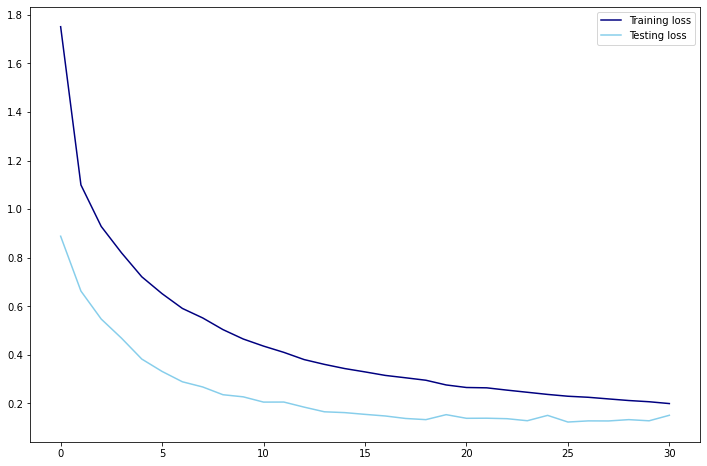

In [23]:
# Visualize the loss
train_loss = res.history['loss']
test_loss = res.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [24]:
test = pd.read_csv("digit-recognizer/test.csv")

In [26]:
test /= 255

In [32]:
preds = model.predict(test)

875/875 [==============================] - 3s 3ms/step


In [33]:
preds

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9289202e-24,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [34]:
pred_df = pd.DataFrame(preds) # columns=['wage'] to name column
pred_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.928920e-24,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [38]:
classes=np.argmax(preds,axis=1)
classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [39]:
classes_df = pd.DataFrame(classes) # columns=['wage'] to name column
classes_df.head()

,0
0,2
1,0
2,9
3,7
4,3


In [40]:
classes_df.to_csv('submission.csv', index=False)